# Linear Models

[Resource](https://scikit-learn.org/stable/modules/linear_model.html)

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
</math> is the predicted value.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">(</mo>
  <mi>w</mi>
  <mo>,</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>w</mi>
    <mn>0</mn>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>w</mi>
    <mn>1</mn>
  </msub>
  <msub>
    <mi>x</mi>
    <mn>1</mn>
  </msub>
  <mo>+</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>+</mo>
  <msub>
    <mi>w</mi>
    <mi>p</mi>
  </msub>
  <msub>
    <mi>x</mi>
    <mi>p</mi>
  </msub>
</math>

Across the module, we designate the vector <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>w</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>,</mo>
  <msub>
    <mi>w</mi>
    <mi>p</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math> as `coef_` and <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>w</mi>
    <mn>0</mn>
  </msub>
</math> as `intercept_`.

In [56]:
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## Ordinary Least Squares

`LinearRegression` fits a linear model with coefficients <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>w</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>,</mo>
  <msub>
    <mi>w</mi>
    <mi>p</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math> to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munder>
    <mo data-mjx-texclass="OP" movablelimits="true">min</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>w</mi>
    </mrow>
  </munder>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>X</mi>
  <mi>w</mi>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msubsup>
    <mo stretchy="false">|</mo>
    <mn>2</mn>
    <mn>2</mn>
  </msubsup>
</math>

![Alt image](../images/sphx_glr_plot_ols_ridge_001.png)

`LinearRegression` takes in its `fit` method arguments `X`, `y`, `sample_weight` and stores the coefficients <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math> of the linear model in its `coef_` ad `intercept_` attributes:

In [57]:
reg = linear_model.LinearRegression()
reg.fit([[0, 0],[1, 1], [2, 2]], [0, 1, 2])

print(reg.coef_)
print(reg.intercept_)

[0.5 0.5]
4.440892098500626e-16


The coefficient estimates for OLS rely on the independence of the features. When features are correlated and some columns of the design matrix <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>X</mi>
</math> have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of **multicollinearity** can arise, for example, when data are collected without an experimental design.

## OLS and Ridge Regression Examples

[Resource](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-py)

1. Ordinary Least Squares: We illustrate how to use the ordinary least squares (OLS) model, `LinearRegression`, on a single feature of the diabetes dataset. We train on a subset of the data, evaluate on a test set, and visualize the predictions.
1. Ordinary Least Squares and Ridge Regression Variance: We then show how OLS can have high variance when the data is sparse or noisy, by fitting on a very small synthetic sample repeatedly. Ridge regression, `Ridge`, reduces this variance by penalizing (shrinking) the coefficients, leading to more stable predictions.

### Data Loading and Preparation

Load the diabetes dataset. For simplicity, we only keep a single feature in the data. Then, we split the data and target into training and test sets.

In [58]:
X, y = load_diabetes(return_X_y=True)
X = X[:, [2]] # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

print(f"X shape: {X.shape}\nX_train shape: {X_train.shape}\n")
print(f"y shape: {y.shape}\ny_train shape: {y_train.shape}")

X shape: (442, 1)
X_train shape: (422, 1)

y shape: (442,)
y_train shape: (422,)


### Linear Regression Model

We create a linear regression model and fit it on the training data. **Note that by default, an intercept is added to the model**. We can control this behavior by setting the `fit_intercept` parameter.

In [59]:
regressor = LinearRegression().fit(X_train, y_train)

### Model Evaluation

We evaluate the model's performance on the test set using the mean squared error and the coefficient of determination.

**Reminder:** R^2 measures how much of the variance in your target variable gets explained by your model. It ranges from 0 to 1. For example, and R^ value of 0.7 means that your model explains 70% of the variance in the data.

In [60]:
y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


### Plotting the Results

Finally, we visualize the results on the train and test data.

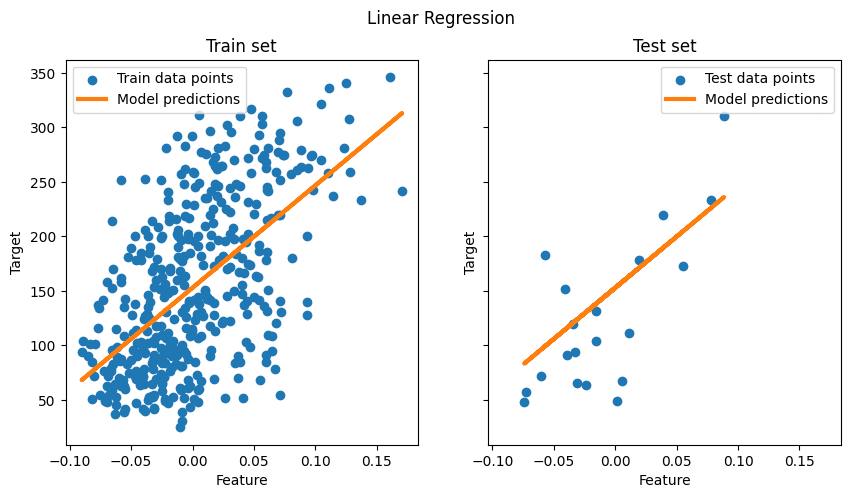

In [61]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

OLS on this single-feature subset learns a linear function that minimizes the mean squared error on the training data. We can see how well (or poorly) it generalizes by looking at the R^2 score and mean squared error on the test set. In higher dimensions, pure OLS often overfits, especially if the data is noisy. Regularization techniques can help reduce that.

### OLS and Ridge Regression Variance

Next, we illustrate the problem of high variance more clearly by using a tiny synthetic dataset. We sample only two data points, then repeatedly add small Gaussian noise to them and refit both OLS and Ridge. We plot each new line to see how much OLS can jump around, whereas Ridge remains more stable thanks to its penalty term.

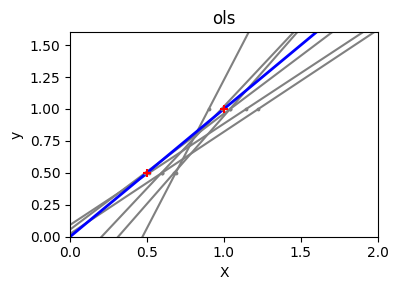

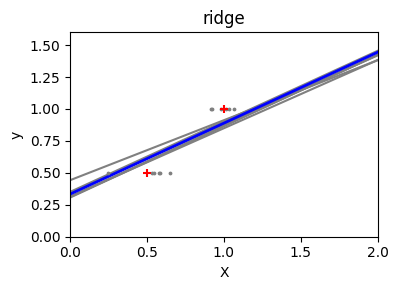

In [62]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

### Conclusion
* In the first example, we applied OLS to a real dataset, showing how a plain linear model can fit the data by minimizing the squared error on the training set.
* In the second example, OLS lines varied drastically each time noise was added, reflecting its high variance when data is sparse or noisy. By contrast, Ridge regression introduces a regularization term that shrinks the coefficients, stabilizing predictions.

Techniques like `Ridge` or `Lasso` (which applies an L1 penalty) are both common ways to improve generalization and reduce overfitting. A well-tuned Ridge or Lasso often outperforms pure OLS when features are correlated, data is noisy, or sample size is small.

# Non-Negative Least Squares

It's possible to constrain all the coefficients to be non-negative, which may be useful when they represent some physical or naturally non-negative quantities (such as frequency counts or prices of goods). `LinearRegression` accepts a boolean `positive` parameter: when set to `True` Non-Negative Least Squares are then applied.

## Non-Negative Least Squares Example

In this example, we fit a linear model with positive constraints on the regression coefficients and compare the estimated coefficients to a classic linear regression.

Generate some random data

In [63]:
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

Split the data in train set and test set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Fit the Non-Negative least squares.

In [65]:
reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196525


Fit an OLS

In [66]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.743692629170035


Comparing the regression coefficients between OLS and NNLS, we can observe that they are highly correlated (the dashed line is the identity relation), but the non-negative constraint shrinks some to 0. The Non-Negative Least Squares inherently yield sparse results.

Text(0, 0.5, 'NNLS regression coefficients')

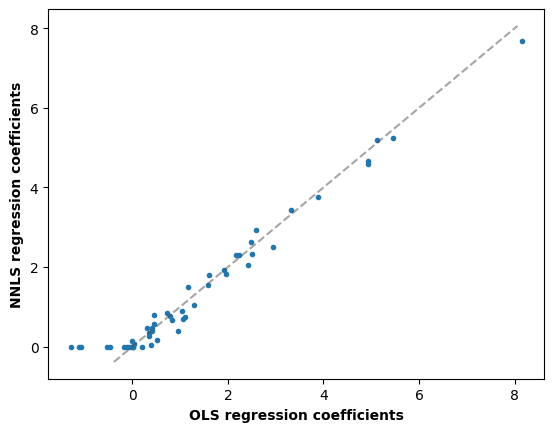

In [67]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

# OLS Complexity

The least squares solution is computed using the singular value decomposition of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>X</mi>
</math>. If <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>X</mi>
</math> is a matrix of shape `(n_samples, n_features)` this method has a cost of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>O</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>n</mi>
    <mrow data-mjx-texclass="ORD">
      <mtext>samples</mtext>
    </mrow>
  </msub>
  <msubsup>
    <mi>n</mi>
    <mrow data-mjx-texclass="ORD">
      <mtext>features</mtext>
    </mrow>
    <mn>2</mn>
  </msubsup>
  <mo stretchy="false">)</mo>
</math>, assuming that <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>n</mi>
    <mrow data-mjx-texclass="ORD">
      <mtext>samples</mtext>
    </mrow>
  </msub>
  <mo>&#x2265;</mo>
  <msub>
    <mi>n</mi>
    <mrow data-mjx-texclass="ORD">
      <mtext>features</mtext>
    </mrow>
  </msub>
</math>.

# Ridge Regression and Classification

## Regression

`Ridge` regression assumes some of the problems of OLS by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munder>
    <mo data-mjx-texclass="OP" movablelimits="true">min</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>w</mi>
    </mrow>
  </munder>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>X</mi>
  <mi>w</mi>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msubsup>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mn>2</mn>
    <mn>2</mn>
  </msubsup>
  <mo>+</mo>
  <mi>&#x3B1;</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>w</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msubsup>
    <mo stretchy="false">|</mo>
    <mn>2</mn>
    <mn>2</mn>
  </msubsup>
</math>

The complexity parameter <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x3B1;</mi>
  <mo>&#x2265;</mo>
  <mn>0</mn>
</math> controls the amount of shrinkage: the larger the value is, the greater amount of shrinkage and thus the coefficients become more robust to collinearity.

![Alt image](../images/sphx_glr_plot_ridge_path_001.png)

As with other linear models, `Ridge` will take in its `fit` method arrays `X`, `y` and will store the coefficients <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math> of the linear model in its `coef_` member:

In [76]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

print(reg.coef_)
print(reg.intercept_)

[0.34545455 0.34545455]
0.13636363636363638


Note that the class `Ridge` allows for the user to specify that the solver be automatically chosen by setting `solver="auto"`. When this option is specified, `Ridge` will choose between the `"lbfgs"`, `"cholesky"`, and `"sparse_cg"` solvers. `Ridge` will begin checking the conditions shown in the following table from top to bottom. If the condition is true, the corresponding solver is chosen.

| Solver | Condition |
|---------|-----------|
| 'lbfgs' | The `positive=True` option is specified. |
| 'cholesky' | The input array X is not sparse. |
| 'sparse_cg' | None of the above conditions are fulfilled. |


## Example: Plot Ridge Coefficients as a Function of the Regularization

